In [73]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


%matplotlib inline

In [4]:
df_delhi_poll =pd.read_csv("data/Delhi_Pollution.csv")
df_places =pd.read_csv("data/places_data.csv")
df_redWine = pd.read_csv("data/Redwine_Quality.csv")
df_loans = pd.read_csv("data/ShortTermHomeLoans.csv")

In [8]:
df_places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Climate      329 non-null    int64
 1   HousingCost  329 non-null    int64
 2   HlthCare     329 non-null    int64
 3   Crime        329 non-null    int64
 4   Transp       329 non-null    int64
 5   Educ         329 non-null    int64
 6   Arts         329 non-null    int64
 7   Recreat      329 non-null    int64
 8   Econ         329 non-null    int64
 9   Pop          329 non-null    int64
dtypes: int64(10)
memory usage: 25.8 KB


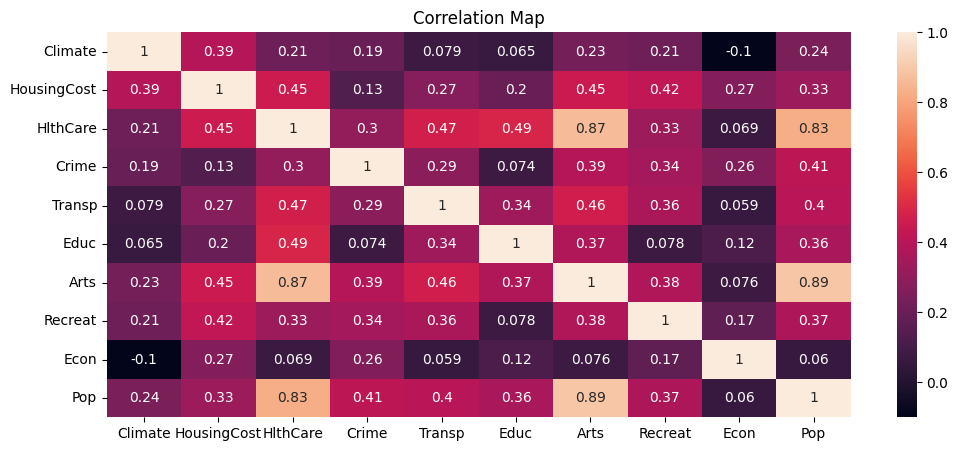

In [15]:
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(df_places.corr(), annot=True, ax=ax)
ax.set_title("Correlation Map")
plt.show()

In [23]:
df_corr = df_places.corr()

In [24]:
df_corr

,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ,Pop
Climate,1.000000,0.386291,0.213303,0.192387,0.079120,0.064520,0.226974,0.213509,-0.100083,0.244697
HousingCost,0.386291,1.000000,0.453010,0.134222,0.271922,0.197934,0.448568,0.422288,0.269433,0.326294
HlthCare,0.213303,0.453010,1.000000,0.304659,0.470317,0.490234,0.865796,0.325397,0.069271,0.827560
Crime,0.192387,0.134222,0.304659,1.000000,0.286578,0.074416,0.389483,0.344627,0.259995,0.412730
Transp,0.079120,0.271922,0.470317,0.286578,1.000000,0.335992,0.464806,0.364716,0.059247,0.402214
Educ,0.064520,0.197934,0.490234,0.074416,0.335992,1.000000,0.373279,0.077807,0.119700,0.359230
Arts,0.226974,0.448568,0.865796,0.389483,0.464806,0.373279,1.000000,0.378659,0.075673,0.888508
Recreat,0.213509,0.422288,0.325397,0.344627,0.364716,0.077807,0.378659,1.000000,0.173531,0.369900
Econ,-0.100083,0.269433,0.069271,0.259995,0.059247,0.119700,0.075673,0.173531,1.000000,0.059758
Pop,0.244697,0.326294,0.827560,0.412730,0.402214,0.359230,0.888508,0.369900,0.059758,1.000000


### With Pandas DataFrame

In [142]:
standardized_df = (df_places - df_places.mean()) / df_places.std()
covariance_matrix = standardized_df.cov()
eigenvalues, eigenvectors = np.linalg.eigh(df_corr)

### Sorting eigen values and vectors in desc of eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
##
k = 3  # Change based on your desired number of dimensions
print("Eigen Values")
print(eigenvalues[:k])
print("Eigen Vectors")
print(eigenvectors[:k])
###
reduced_eigenvectors = eigenvectors[:,:k]
transformed_data = standardized_df.dot(reduced_eigenvectors)

pd.DataFrame(np.array(transformed_data), columns=["PC"+str(i) for i in range(1,k+1)])

Eigen Values
[4.09361543 1.25913695 1.14215156]
Eigen Vectors
[[-0.17857693  0.21444626  0.69722179 -0.13570711 -0.21720636 -0.46536983
   0.04605633  0.38055874  0.0576551   0.0597538 ]
 [-0.29679112  0.3394951   0.20939521 -0.52123935  0.07099717  0.23208557
   0.25184529 -0.56005065 -0.16016239 -0.13957869]
 [-0.43713676 -0.25841139 -0.01398491 -0.04643796 -0.12788483  0.18456471
   0.04458134 -0.00412769  0.81637766 -0.14452429]]


,PC1,PC2,PC3
0,1.175715,0.920768,-1.376826
1,-0.492982,-0.059830,1.169437
2,1.863843,-0.173765,-0.041373
3,-0.965731,-1.448585,-1.241709
4,-1.866117,0.627100,-0.026957
...,...,...,...
324,0.157283,-1.477121,0.106784
325,1.189654,0.523534,0.388835
326,1.587798,-1.030066,0.604743
327,0.631543,-1.253413,0.910977


###  With Sklearn PCA

In [143]:
scaler = StandardScaler()
standardized_df = scaler.fit_transform(df_places)

n_comp = 3

pca = PCA(n_components=n_comp)
transformed_data  = pca.fit_transform(standardized_df)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
pd.DataFrame(transformed_data, columns=["PC"+str(i) for i in range(1,n_comp+1)])

[0.40936154 0.1259137  0.11421516]


,PC1,PC2,PC3
0,-1.177506,-0.922170,-1.378923
1,0.493733,0.059922,1.171219
2,-1.866682,0.174029,-0.041436
3,0.967202,1.450791,-1.243601
4,1.868959,-0.628056,-0.026999
...,...,...,...
324,-0.157522,1.479371,0.106947
325,-1.191466,-0.524331,0.389427
326,-1.590216,1.031635,0.605665
327,-0.632505,1.255323,0.912365


In [140]:
# Eigne Vectors
pca.explained_variance_

array([4.10609597, 1.26297578, 1.14563372])

In [141]:
# Eigne Vectors
pca.components_

array([[ 0.17857693,  0.29679112,  0.43713676,  0.25420836,  0.30499254,
         0.24569027,  0.44571283,  0.28069485,  0.10148628,  0.42799735],
       [-0.21444626, -0.3394951 ,  0.25841139, -0.3289178 ,  0.08071197,
         0.35994073,  0.18262016, -0.41915768, -0.52717209,  0.20190857],
       [ 0.69722179,  0.20939521, -0.01398491, -0.15586793, -0.16646766,
        -0.27205567,  0.01522775,  0.07014996, -0.58155024,  0.0215799 ]])